# **E-commerce Customer Value Analysis through LRFMC Indicators by Performing K-Means Clustering Algorithm**

**Introduction**

Hi, I'm Aldy Budhi Iskandar, a Data Scientist Enthusiast that just started my data learning journey through joining Dibimbing bootcamp Data Science Batch 13. This dataset is one branded e-commerce customers data with 2022-08-29 as the end time. The detailed data is including the basic customer information such as frequent transaction information, as well as the other transaction information.

This dataset consists of **24354 rows** and **7 columns**. In this project, we will do e-commerce customer value analysis through LRFMC indicators by performing K-Means clustering algorithm.

Please kindly connect to my LinkedIn https://www.linkedin.com/in/aldybudhi/ and visit my Github https://github.com/qodym/

Thank You in Advance!

**Please kindly note that the highlight of this project is performing K-Means Clustering algorithm for customer value analysis through LRFMC indicators, so there may be some steps missed**

## **Background & The Steps**

**Background**

* Along with the development of information and technology accompanied by increasingly fierce business competition, the company is trying to shift from a product-centric approach to a customer-centric approach.
* A customer-centric approach will enable companies to create better relationships with customers, prioritize customer needs, and increase customer retention, which will lead to increased company profits.
* For this reason, companies need to classify customers accurately, formulate personalized service plans based on the classification results, and optimize enterprise marketing resource allocation plans.
* The aviation company's marketing team can establish a reasonable customer value evaluation model, segment customers, analyze and compare the value of customers from different groups, and formulate appropriate marketing strategies to provide personalized customer service according to customer needs.

**The steps in this project:**

* Data collection.
* Data understanding by performing the statistic descriptive of data.
* Data preprocessing that includes handling missing value, feature selection based on LRFMC, handling outlier and also data scaling.
* Clustering process by K-Means algorithm.
* Analyze the result - customer value analysis.

# **Import Package**

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


# **Import Dataset**

In [179]:
df = pd.read_csv('E-commerce_customers.csv')
df

,user_id,total_transaction,total_money_spent,tran_with_disc,last_order_date,created_at,data_pulled_date
0,2603,2,237000,0,2018-06-14 03:34:24,2018-02-12 06:13:18,2022-08-29
1,6097,2,400000,0,2019-07-11 10:42:37,2018-06-12 23:26:34,2022-08-29
2,7987,2,295000,0,2018-09-06 11:19:19,2018-06-15 22:31:02,2022-08-29
3,7988,2,335000,0,2018-07-12 18:44:02,2018-06-15 23:52:29,2022-08-29
4,7472,1,154000,0,2018-06-16 10:52:51,2018-06-12 23:34:43,2022-08-29
...,...,...,...,...,...,...,...
24349,67666,1,8000,0,2022-03-16 18:52:00,2022-03-15 09:54:52,2022-08-29
24350,67662,1,64000,0,2022-03-16 19:00:43,2022-03-14 21:56:49,2022-08-29
24351,67661,2,427500,2,2022-03-16 19:29:07,2022-03-14 21:07:27,2022-08-29
24352,67740,1,0,1,2022-03-16 19:31:03,2022-03-16 19:07:04,2022-08-29


# **Data Understanding**

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            24354 non-null  int64 
 1   total_transaction  24354 non-null  int64 
 2   total_money_spent  24354 non-null  int64 
 3   tran_with_disc     24354 non-null  int64 
 4   last_order_date    24354 non-null  object
 5   created_at         24354 non-null  object
 6   data_pulled_date   24354 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.3+ MB


This dataset consists of **24354 rows** and **7 columns**. The following is a description of the dataset that will be analyzed to help understand what data we will use in this project.

Contents:

`user_id` : Customers ID (unique value).

`total_transaction` : Total of customers transaction.

`total_money_spent` : Total of customers spent money (in IDR).

`tran_with_disc` : Total customers transaction using promo/discount.

`last_order_date` : Date on the customers last transaction (DateTime).

`created_at` : Customer join date (DateTime).

`data_pulled_date` : Date on data customers loaded (DateTime).

**Observation:**

* `user_id` column has unique value, **no need to drop** or process but still need for conclusion section.
* Need to change `last_order_date`, `created_at`, & `data_pulled_date` columns to **datetime**.
* `data_pulled_date` column just has 1 value (2022-08-29).

In [181]:
columns = ['last_order_date', 'created_at', 'data_pulled_date']

df[columns] = df[columns].apply(pd.to_datetime, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            24354 non-null  int64         
 1   total_transaction  24354 non-null  int64         
 2   total_money_spent  24354 non-null  int64         
 3   tran_with_disc     24354 non-null  int64         
 4   last_order_date    24354 non-null  datetime64[ns]
 5   created_at         24354 non-null  datetime64[ns]
 6   data_pulled_date   24354 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4)
memory usage: 1.3 MB


`last_order_date`, `created_at`, & `data_pulled_date` Dtype has changed to **datetime64**.

# **Exploratory Data Analysis**

Univariate Analysis:
* Median and Average total transactions per user?
* Median and Average each user spends money on shopping?
* In what month most users join?
* In what year most users join?
* How many old users (join before 2020) have a total transaction value and total money spent above the average?

Multivariate Analysis:
* Is the more total transaction, the more total money spent?


## Univariate Analysis

### Median and Average total transactions per user

In [182]:
df['total_transaction'].describe()

count    24354.000000
mean         1.763283
std         18.033902
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       2792.000000
Name: total_transaction, dtype: float64

Median transaction is **1 transaction** and Average transaction is **1.7 transactions** per user.

In [183]:
tot_trns = (df
            .groupby('total_transaction')
            .agg(freq=('total_transaction','count'))
            .reset_index()
            .sort_values('freq',ascending=False)
            .reset_index(drop = True)
            )
tot_trns['percentage'] = round((tot_trns['freq'] / len(df)) * 100, 2)
tot_trns

,total_transaction,freq,percentage
0,1,17406,71.47
1,2,4055,16.65
2,3,1387,5.70
3,4,616,2.53
4,5,295,1.21
5,6,171,0.70
6,7,111,0.46
7,8,70,0.29
8,9,45,0.18
9,10,29,0.12


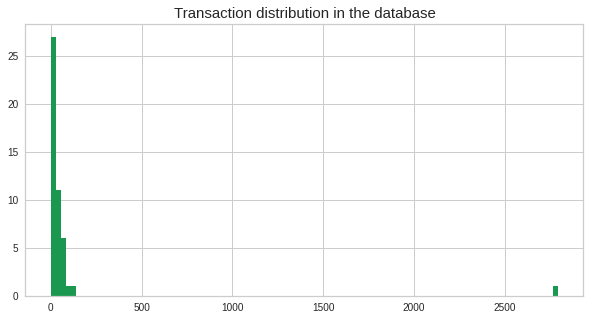

In [184]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x = tot_trns['total_transaction'], bins = 100, color= '#1A984F')
plt.title('Transaction distribution in the database', fontsize=15)

plt.show()

### Median and Average each user spends money on shopping

In [185]:
df['total_money_spent'].describe()

count    2.435400e+04
mean     3.324203e+05
std      3.907721e+06
min     -2.100000e+05
25%      1.550000e+05
50%      2.000000e+05
75%      3.380000e+05
max      6.062242e+08
Name: total_money_spent, dtype: float64

There are outlier that make `total_money_spent` values **impossible** (minus value), must be delete.

In [186]:
df = df[df['total_money_spent'] > 0]
df['total_money_spent'].describe()

count    2.435100e+04
mean     3.324698e+05
std      3.907959e+06
min      8.000000e+03
25%      1.550000e+05
50%      2.000000e+05
75%      3.380000e+05
max      6.062242e+08
Name: total_money_spent, dtype: float64

Median money spent is **IDR 200,000** and Average money spent is **IDR 332,469** per user.

In [187]:
tot_mspent = (df
            .groupby('total_money_spent')
            .agg(freq=('total_money_spent','count'))
            .reset_index()
            .sort_values('freq',ascending=False)
            .reset_index(drop = True)
            )
tot_mspent['percentage'] = round((tot_mspent['freq'] / len(df)) * 100, 2)
tot_mspent

,total_money_spent,freq,percentage
0,160000,693,2.85
1,145000,390,1.60
2,163000,328,1.35
3,175000,287,1.18
4,148000,217,0.89
...,...,...,...
13198,180381,1,0.00
13199,180428,1,0.00
13200,180469,1,0.00
13201,180500,1,0.00


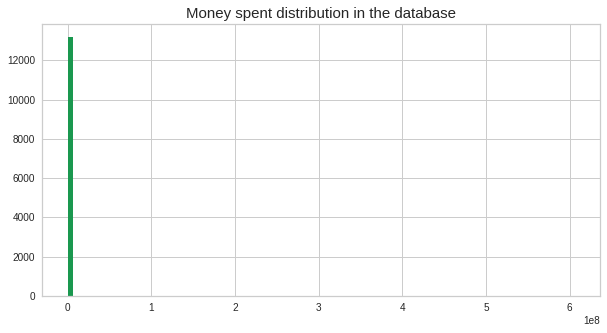

In [188]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(x = tot_mspent['total_money_spent'], bins = 100, color= '#1A984F')
plt.title('Money spent distribution in the database', fontsize=15)

plt.show()

### In what month most users join

In [189]:
df['create_month'] = pd.DatetimeIndex(df['created_at']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [190]:
df['create_month'].value_counts()

4     3569
5     3214
12    2271
9     2108
8     1969
2     1832
7     1813
6     1725
11    1651
3     1490
10    1409
1     1300
Name: create_month, dtype: int64

The most users join at **April** in every year.

In [191]:
month_create = (df
            .groupby('create_month')
            .agg(freq=('create_month','count'))
            .reset_index()
            .sort_values('freq',ascending=False)
            .reset_index(drop = True)
            )
month_create['percentage'] = round((month_create['freq'] / len(df)) * 100, 2)
month_create

,create_month,freq,percentage
0,4,3569,14.66
1,5,3214,13.20
2,12,2271,9.33
3,9,2108,8.66
4,8,1969,8.09
5,2,1832,7.52
6,7,1813,7.45
7,6,1725,7.08
8,11,1651,6.78
9,3,1490,6.12


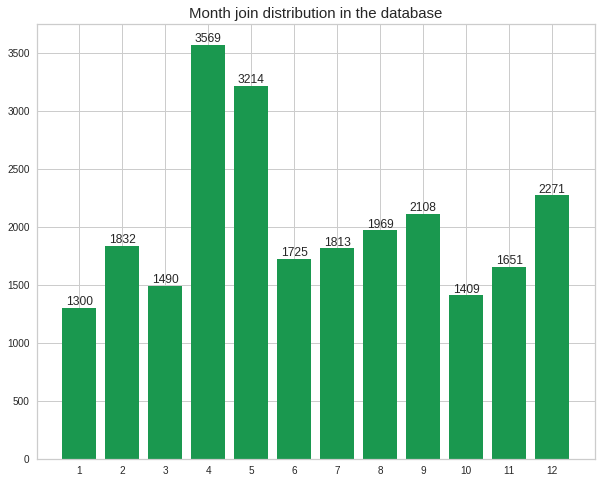

In [192]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.bar(x = month_create['create_month'], height = month_create['freq'], color= '#1A984F')
plt.xticks(list(range(1,13,1)))
plt.title('Month join distribution in the database',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center', va='bottom')

plt.show()

From the graph it can be concluded that the average value of new users who join is **most often in April and May** compared to other months.

### In what year most users join

In [193]:
df['create_year'] = pd.DatetimeIndex(df['created_at']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [194]:
df['create_year'].value_counts()

2019    8944
2020    7220
2021    4266
2018    3690
2022     231
Name: create_year, dtype: int64

The most users join at **2019**.

In [195]:
year_create = (df
            .groupby('create_year')
            .agg(freq=('create_year','count'))
            .reset_index()
            .sort_values('freq',ascending=False)
            .reset_index(drop = True)
            )
year_create['percentage'] = round((year_create['freq'] / len(df)) * 100, 2)
year_create

,create_year,freq,percentage
0,2019,8944,36.73
1,2020,7220,29.65
2,2021,4266,17.52
3,2018,3690,15.15
4,2022,231,0.95


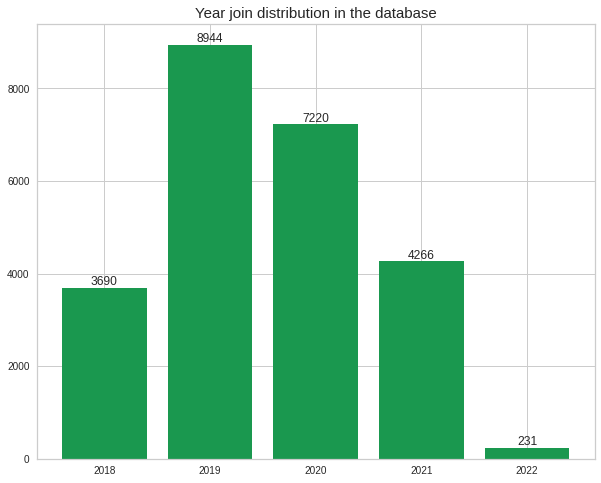

In [196]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.bar(x = year_create['create_year'], height = year_create['freq'], color= '#1A984F')
plt.xticks(list(range(2018,2023,1)))
plt.title('Year join distribution in the database',fontsize=15)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height}', ha='center', va='bottom')

plt.show()

From the graph, the number of new users continues to **decline every year**, from 2020 to 2021, it is experiencing a drastic decline.

### How many old users (join before 2020) have a total transaction value and total money spent above the average

In [197]:
old_users = df[df['create_year'] < 2020]
old_users = old_users[['total_transaction', 'total_money_spent']]
old_users.describe()

,total_transaction,total_money_spent
count,12634.000000,1.263400e+04
mean,1.581447,3.042778e+05
std,2.224136,3.873938e+05
min,1.000000,1.946800e+04
25%,1.000000,1.583230e+05
50%,1.000000,1.940000e+05
75%,2.000000,3.350000e+05
max,113.000000,1.945079e+07


Average Total Transaction from old users is **1.5 Transaction** and Average money spent from old users is **IDR 304,277** per user.

In [198]:
old_users = old_users[old_users['total_transaction'] > 1.581447]
old_users = old_users[old_users['total_money_spent'] > 3.042778e+05]
old_users.count()

total_transaction    2824
total_money_spent    2824
dtype: int64

There are **2824 old users** that have `total_transaction` and `total_money_spent` value above the average from old users group.

## Bivariate Analysis

### Is the more total transaction, the more total money spent

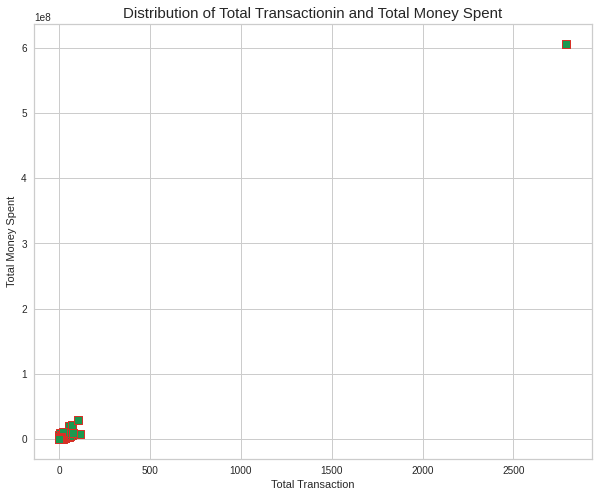

In [199]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(x = df['total_transaction'], y = df['total_money_spent'], c = '#1A984F',
            linewidths = 1,
            marker ="s",
            edgecolor = '#D73026',
            s = 50)

plt.title('Distribution of Total Transactionin and Total Money Spent',fontsize=15)
plt.xlabel("Total Transaction")
plt.ylabel("Total Money Spent")
plt.show()

Let's try to limit the total transaction to a **maximum of 100 transactions**.

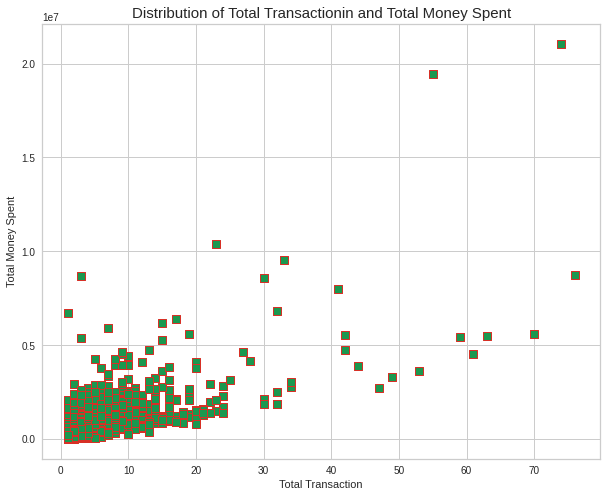

In [200]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(x = df['total_transaction'][df['total_transaction'] < 100],
            y = df['total_money_spent'][df['total_transaction'] < 100],
            c = '#1A984F',
            linewidths = 1,
            marker ="s",
            edgecolor = '#D73026',
            s = 50)

plt.title('Distribution of Total Transactionin and Total Money Spent',fontsize=15)
plt.xlabel("Total Transaction")
plt.ylabel("Total Money Spent")
plt.show()

It can be interpreted that the higher the value of `total transaction`, the higher the value of `total_money_spent` (**directly proportional**).

# **Data Preprocessing**

## Check Null & Missing Values

In [201]:
df.isna().sum()

user_id              0
total_transaction    0
total_money_spent    0
tran_with_disc       0
last_order_date      0
created_at           0
data_pulled_date     0
create_month         0
create_year          0
dtype: int64

There are not **Missing Value**.

## Feature Selection based on LRMFC Model

**LRFMC indicator:**

**L ( Length Relation )** = `data_pulled_date` - `created_at`

The number of months since the customer’s membership time from the end of the observation window = end time of the observation window-time to join (unit: month).

**R ( Recency )** = `data_pulled_date` - `last_order_date`

The number of months since the customer’s most recent ordered to the end of the observation window = the time from the last ordered to the end of the observation window (Unit: month).

**F ( Frequency )** = `total_transaction`

The number of times the customer ordered in the observation window = the number of order in the observation window (unit: times).

**M ( Monetary Value )** = `total_money_spent`

The accumulated spent of the customer in E-commerce during the observation period = the total customer spending money in the observation window (unit: IDR).

**C ( Coefficient Value )** = `tran_with_disc` / `total_transaction`

The percentage value of the transaction with voucher/promo in ordered during the observation period = percentage discount rate (unit: percent).

In [202]:
df_LRFMC = df.copy()

df_LRFMC['L'] = (df['data_pulled_date'] - df['created_at']).dt.days/30

df_LRFMC['R'] = (df['data_pulled_date'] - df['last_order_date']).dt.days/30

df_LRFMC['C'] = (df['tran_with_disc'] / df['total_transaction'] * 100)

df_LRFMC.rename(columns={'total_transaction':'F','total_money_spent':'M'}, inplace = True)

df_LRFMC = df_LRFMC[df_LRFMC['M'] > 0]

ColumnsTitles = ['user_id', 'L', 'R', 'F', 'M', 'C']
df_LRFMC = df_LRFMC.reindex(columns=ColumnsTitles)
df_LRFMC.head()

,user_id,L,R,F,M,C
0,2603,55.266667,51.200000,2,237000,0.0
1,6097,51.266667,38.133333,2,400000,0.0
2,7987,51.166667,48.400000,2,295000,0.0
3,7988,51.166667,50.266667,2,335000,0.0
4,7472,51.266667,51.133333,1,154000,0.0


Data has been converted into **LRMFC feature**.

## Distribution & Outlier

In [203]:
feat_num = list(df_LRFMC)
feat_num

['user_id', 'L', 'R', 'F', 'M', 'C']

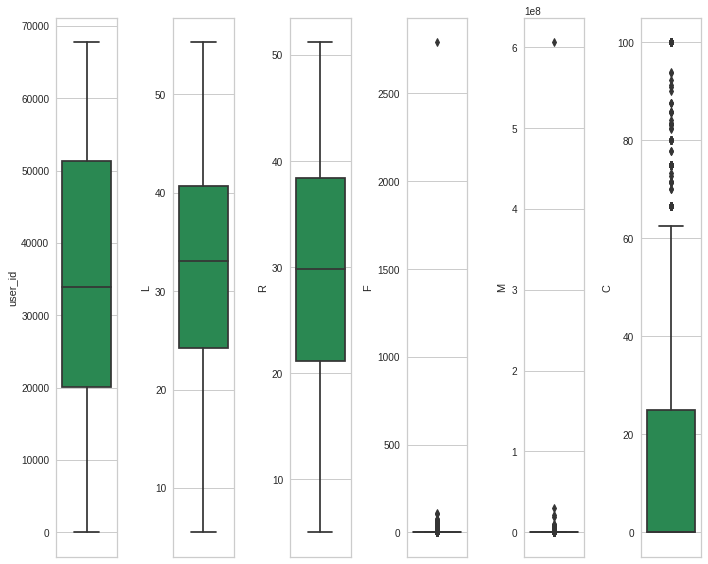

In [204]:
plt.figure(figsize = (10, 8))
for i in range(0, len(feat_num)):
  plt.subplot(1, 6, i+1)
  sns.boxplot(y = df_LRFMC[feat_num[i]], color = '#1A984F', orient = 'v')
  plt.tight_layout()

`F` & `M` columns have outliers.

## Transformation Data to reduce outlier

In [205]:
from scipy import stats

In [206]:
df_LRFMC = df_LRFMC[(np.abs(stats.zscore(df_LRFMC)) < 3).all(axis=1)]

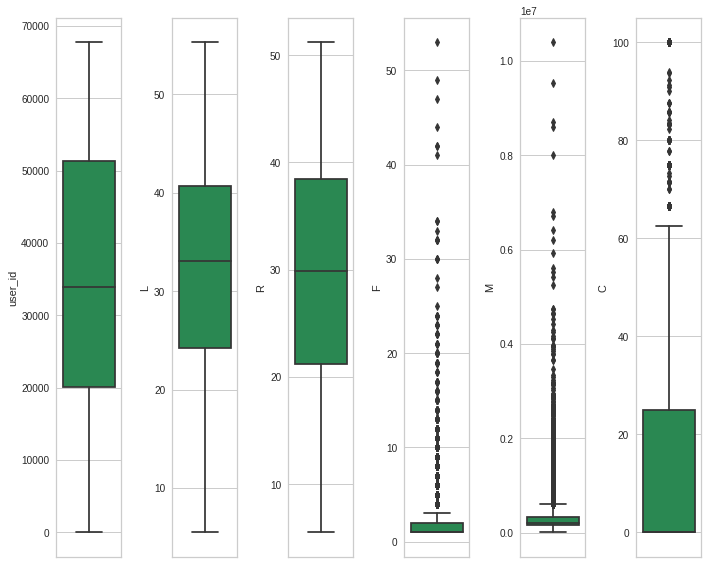

In [207]:
plt.figure(figsize = (10, 8))
for i in range(0, len(feat_num)):
  plt.subplot(1, 6, i+1)
  sns.boxplot(y = df_LRFMC[feat_num[i]], color = '#1A984F', orient = 'v')
  plt.tight_layout()

From the boxplot, it can be interpreted that the data is sufficient to have a normal distribution. For column `F`, `M`, and `C` have a positive skew distribution where the outlier is in the higher value (on the right). In this case, this condition can be interpreted as normal, (does not interfere with the authenticity of the data).

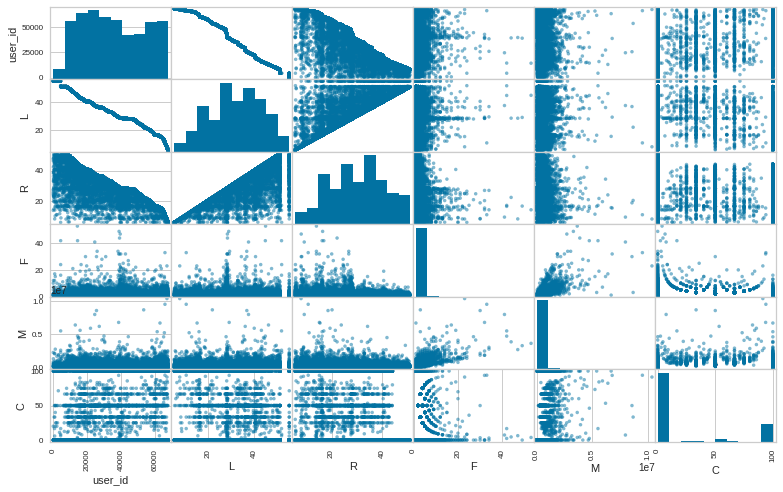

In [208]:
# Scatterplot of all variables

pd.plotting.scatter_matrix(df_LRFMC,figsize=(13,8))
plt.show()

## Check duplicate data after transformation

In [209]:
df_LRFMC.duplicated().sum()

0

There isn't duplicated data.

In [210]:
df_LRFMC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24341 entries, 0 to 24353
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  24341 non-null  int64  
 1   L        24341 non-null  float64
 2   R        24341 non-null  float64
 3   F        24341 non-null  int64  
 4   M        24341 non-null  int64  
 5   C        24341 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.3 MB


**Observation:**

* Now there is only **24341 rows** & **6 columns** data left.
* All data type already float type (numeric).
* Need to Scaling

## Scaling

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
user_id = df_LRFMC[['user_id']]
LRFMC = df_LRFMC[['L', 'R', 'F', 'M', 'C']]

In [213]:
std = StandardScaler().fit_transform(LRFMC)

df_LRFMC_std = pd.DataFrame(data = std, columns = list(LRFMC))
df_LRFMC_std

,L,R,F,M,C
0,2.064354,1.919983,0.206289,-0.192519,-0.557637
1,1.707598,0.725317,0.206289,0.280891,-0.557637
2,1.698679,1.663983,0.206289,-0.024066,-0.557637
3,1.698679,1.834650,0.206289,0.092108,-0.557637
4,1.707598,1.913888,-0.338554,-0.433581,-0.557637
...,...,...,...,...,...
24336,-0.468619,-2.258302,-0.338554,-0.819861,-0.557637
24337,-2.371322,-2.258302,-0.338554,-0.857617,-0.557637
24338,-2.368349,-2.258302,-0.338554,-0.694973,-0.557637
24339,-2.368349,-2.258302,0.206289,0.360761,1.958487


the value of each column has been changed with **Standardize Scaler** (scaled).

# **Clustering K-Means**

In [214]:
from sklearn.cluster import KMeans

## Inertia

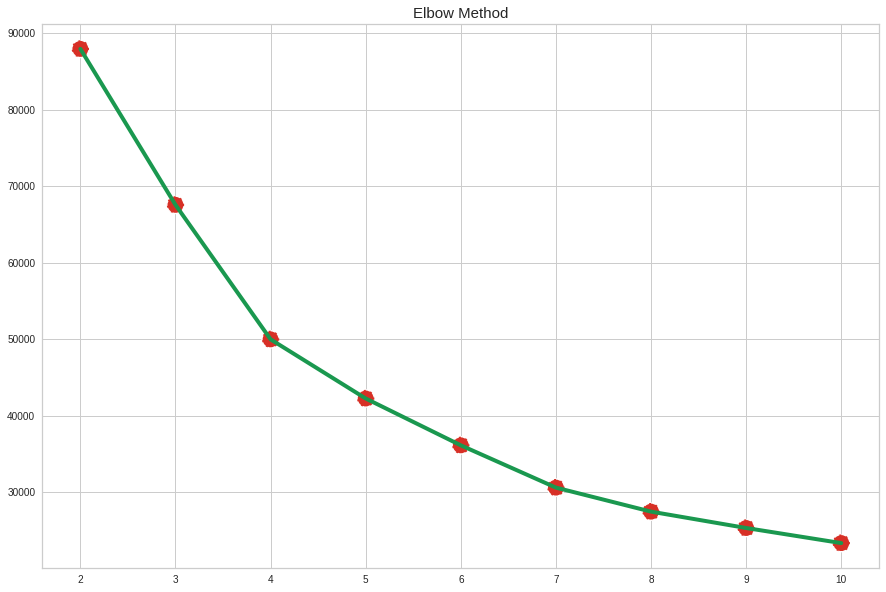

In [215]:
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_LRFMC_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#1A984F', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#D73026',  linestyle='--')
plt.title('Elbow Method',fontsize=15)
plt.show()

The value of each point in the **elbow method** has **almost the same** terms. But for the point **N = 4** shows the beginning of the change in angle from the **elbow method**.

## Via Score Plot

In [216]:
from sklearn.cluster import KMeans

In [217]:
from yellowbrick.cluster import KElbowVisualizer  

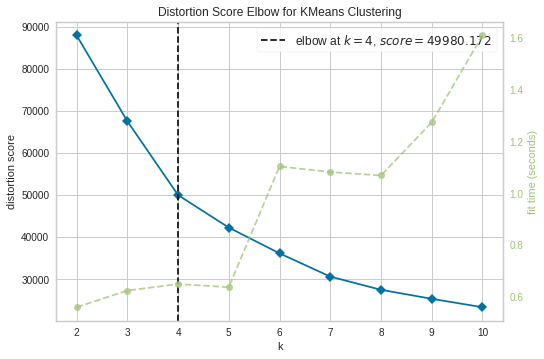

In [218]:
#feature = df_norm.drop(columns=['L', 'R', 'F', 'M', 'C'])
feature = df_LRFMC_std.copy()

model = KMeans()  

# k is range of number of clusters.  
visualizer = KElbowVisualizer(model, k=(2,11), timings= True)  
visualizer.fit(feature)        # Fit data to visualizer  
visualizer.show()        # Finalize and render figure

The results of **via score plot** can be taken as the best and ideal value, which is at point 4, or **N = 4**.

## Silhouette Method

In [219]:
from yellowbrick.cluster import SilhouetteVisualizer

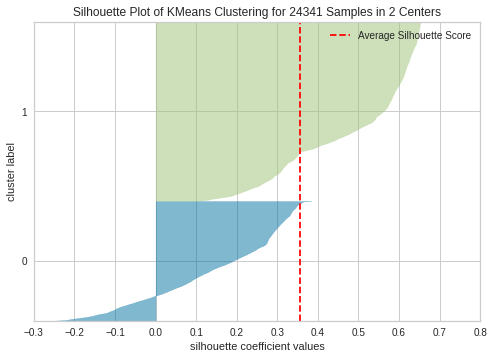

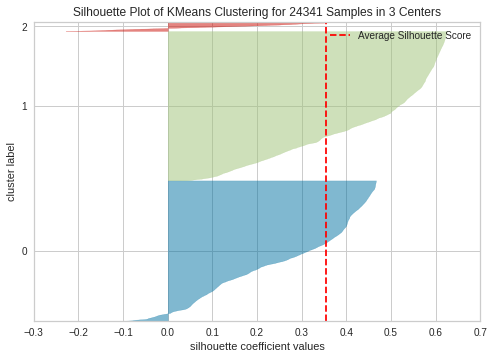

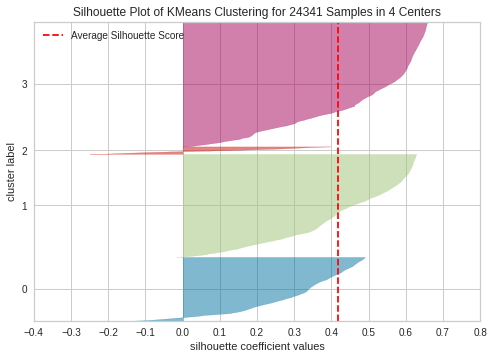

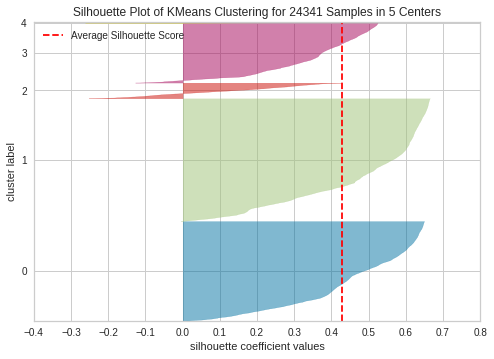

In [220]:
feature_siluet = df_LRFMC_std.copy()

for i in range(2,6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters = i,
                random_state=26,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                algorithm = 'auto'
                )

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(feature_siluet)
    visualizer.show()

As well as the results of **via score plot** and **elbow method**, **silhouette score** shows that the most ideal value is at point 4 or **N = 4**.

## K-Means Clustering Model (N = 4)

In [221]:
# Create clusters using K-Means
kmeans = KMeans(
    n_clusters=4,
    random_state=26,
    init = 'k-means++',
    n_init = 10,
    max_iter = 300,
    algorithm = 'auto'
    ).fit(df_LRFMC_std)

# Assign Cluster
cluster = kmeans.labels_
df_LRFMC_std['clusters'] = cluster
df_LRFMC_std

,L,R,F,M,C,clusters
0,2.064354,1.919983,0.206289,-0.192519,-0.557637,3
1,1.707598,0.725317,0.206289,0.280891,-0.557637,3
2,1.698679,1.663983,0.206289,-0.024066,-0.557637,3
3,1.698679,1.834650,0.206289,0.092108,-0.557637,3
4,1.707598,1.913888,-0.338554,-0.433581,-0.557637,3
...,...,...,...,...,...,...
24336,-0.468619,-2.258302,-0.338554,-0.819861,-0.557637,1
24337,-2.371322,-2.258302,-0.338554,-0.857617,-0.557637,1
24338,-2.368349,-2.258302,-0.338554,-0.694973,-0.557637,1
24339,-2.368349,-2.258302,0.206289,0.360761,1.958487,0


## Check Visualization using PCA & Scatter Plot

This process is carried out only to see an overview of the distribution of customers from each cluster.

In [222]:
from sklearn.decomposition import PCA

In [223]:
pca = PCA(n_components=2)
pca.fit(df_LRFMC_std)
pcs = pca.transform(df_LRFMC_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
pdf['clusters'] = cluster
pdf

,pc1,pc2,clusters
0,-2.931735,0.612885,3
1,-2.120478,0.839739,3
2,-2.613141,0.660471,3
3,-2.676203,0.745454,3
4,-2.860282,0.013558,3
...,...,...,...
24336,1.337805,-1.066493,1
24337,2.214047,-1.400371,1
24338,2.238507,-1.288712,1
24339,3.982082,-0.277896,0


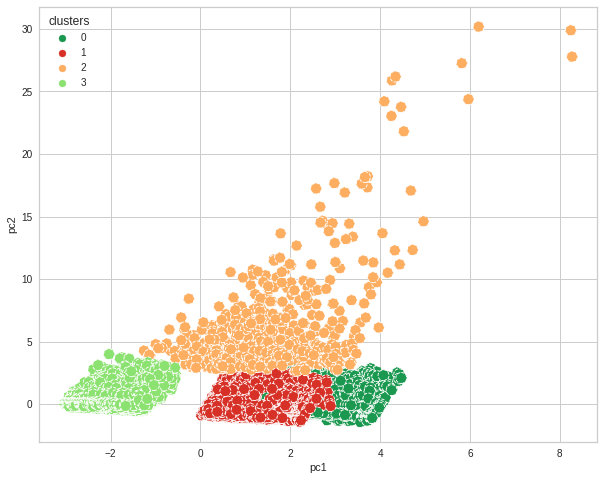

In [224]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x = "pc1",
                y = "pc2",
                hue = "clusters",
                linestyle = '--',
                data = pdf,
                palette = ['#1A984F','#D73026','#FDAE61','#8CE271'],
                s = 120,
                ax = ax)

## Visualization using Bar Plot

In [225]:
clusters_count = pdf.groupby(['clusters'],as_index=False).size()
clusters_count['percentage'] = round((clusters_count['size'] / len(pdf)) * 100, 2)
clusters_count

,clusters,size,percentage
0,0,5200,21.36
1,1,8391,34.47
2,2,606,2.49
3,3,10144,41.67


(0.0, 45.0)

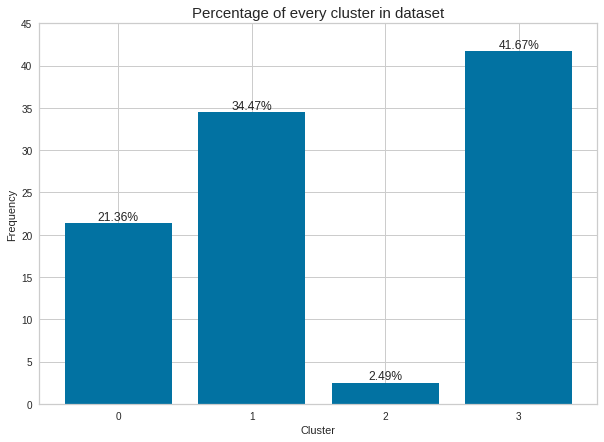

In [226]:
plt.figure(figsize=(10,7))
plt.bar(clusters_count['clusters'], clusters_count['percentage'])
plt.xticks(list(range(0,4,1)))

number_bar = range(len(clusters_count['clusters']))
for i in number_bar:
  plt.text(x = clusters_count['clusters'][i],
           y = clusters_count['percentage'][i] + 0.4,
           s = str(clusters_count['percentage'][i]) + '%',
           size=12,
           ha='center'
           )

plt.title('Percentage of every cluster in dataset',fontsize=15)
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.ylim(0,45)

### RFM Plotting Clustering

In [227]:
df_LRFMC['cluster'] = kmeans.labels_
df_LRFMC

,user_id,L,R,F,M,C,cluster
0,2603,55.266667,51.200000,2,237000,0.0,3
1,6097,51.266667,38.133333,2,400000,0.0,3
2,7987,51.166667,48.400000,2,295000,0.0,3
3,7988,51.166667,50.266667,2,335000,0.0,3
4,7472,51.266667,51.133333,1,154000,0.0,3
...,...,...,...,...,...,...,...
24348,48485,26.866667,5.500000,1,21000,0.0,1
24349,67666,5.533333,5.500000,1,8000,0.0,1
24350,67662,5.566667,5.500000,1,64000,0.0,1
24351,67661,5.566667,5.500000,2,427500,100.0,0


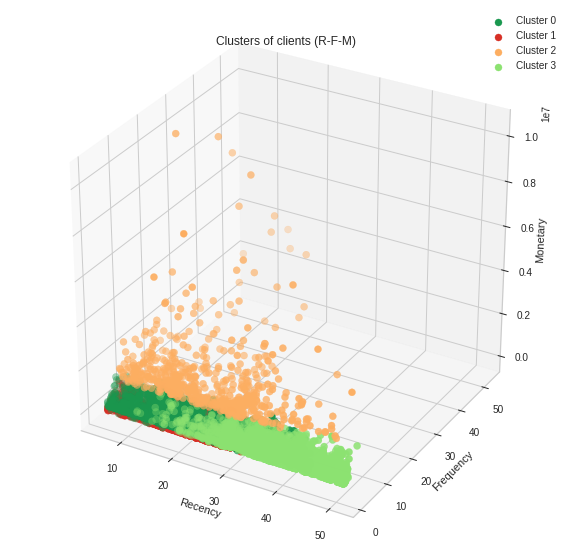

In [228]:
#plot 3D with clustering value
fig = plt.figure(figsize=(10,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['#1A984F','#D73026','#FDAE61','#8CE271']

#range cluster
for i in range(0,4):
    dx.scatter(df_LRFMC[df_LRFMC.cluster == i].R,
               df_LRFMC[df_LRFMC.cluster == i].F,
               df_LRFMC[df_LRFMC.cluster == i].M,
               c = colors[i], label = 'Cluster ' + str(i), s=50)
dx.set_title('Clusters of clients (R-F-M)')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()
plt.show()

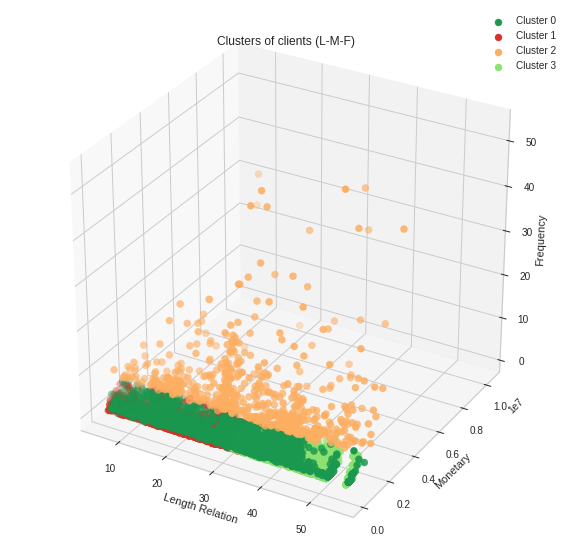

In [229]:
#plot 3D with clustering value
fig = plt.figure(figsize=(10,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['#1A984F','#D73026','#FDAE61','#8CE271']

#range cluster
for i in range(0,4):
    dx.scatter(df_LRFMC[df_LRFMC.cluster == i].L,
               df_LRFMC[df_LRFMC.cluster == i].M,
               df_LRFMC[df_LRFMC.cluster == i].F,
               c = colors[i], label = 'Cluster ' + str(i), s=50)
dx.set_title('Clusters of clients (L-M-F)')
dx.set_xlabel('Length Relation')
dx.set_ylabel('Monetary')
dx.set_zlabel('Frequency')
dx.legend()
plt.show()

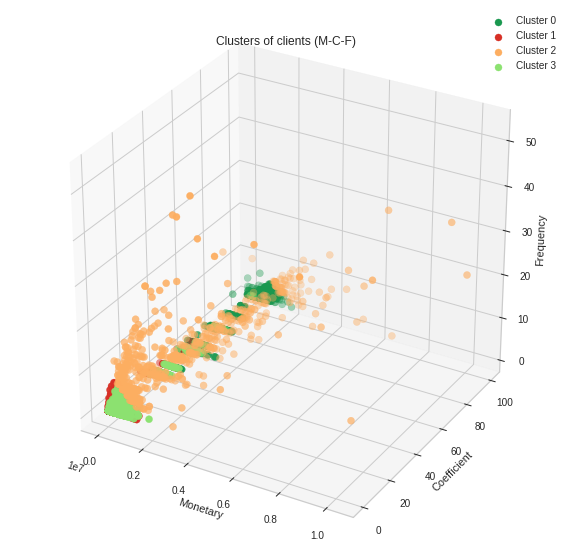

In [230]:
#plot 3D with clustering value
fig = plt.figure(figsize=(10,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['#1A984F','#D73026','#FDAE61','#8CE271']

#range cluster
for i in range(0,4):
    dx.scatter(df_LRFMC[df_LRFMC.cluster == i].M,
               df_LRFMC[df_LRFMC.cluster == i].C,
               df_LRFMC[df_LRFMC.cluster == i].F,
               c = colors[i], label = 'Cluster ' + str(i), s=50)
dx.set_title('Clusters of clients (M-C-F)')
dx.set_xlabel('Monetary')
dx.set_ylabel('Coefficient')
dx.set_zlabel('Frequency')
dx.legend()
plt.show()

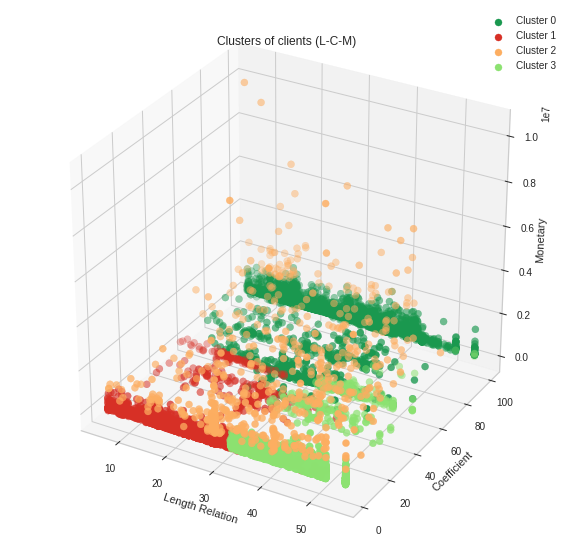

In [231]:
#plot 3D with clustering value
fig = plt.figure(figsize=(10,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['#1A984F','#D73026','#FDAE61','#8CE271']

#range cluster
for i in range(0,4):
    dx.scatter(df_LRFMC[df_LRFMC.cluster == i].L,
               df_LRFMC[df_LRFMC.cluster == i].C,
               df_LRFMC[df_LRFMC.cluster == i].M,
               c = colors[i], label = 'Cluster ' + str(i), s=50)
dx.set_title('Clusters of clients (L-C-M)')
dx.set_xlabel('Length Relation')
dx.set_ylabel('Coefficient')
dx.set_zlabel('Monetary')
dx.legend()
plt.show()

### Calculating Centroid on the Customer Score

In [232]:
from ctypes import sizeof
# clusters' centroid analysis
# derive average of each feature (column)
centroid_df = df_LRFMC.groupby('cluster')[['L', 'R', 'F', 'M', 'C']].agg(
    {'L': 'mean', 'R': 'mean', 'F':'mean', 'M':'mean', 'C': 'mean'}).reset_index()
size = df_LRFMC.groupby('cluster').size().reset_index()

#merge two dataframe
summary = pd.merge(centroid_df, size, on="cluster")
summary.columns = ['cluster', 'Length Relation(month)', 'Recency(month)', 'Frequency(times)', 'Monetary(IDR)', 'Coef_Value', 'Count']

#add columns
summary['%'] = summary['Count']*100/summary['Count'].sum()
summary['M/F(IDR)'] = summary['Monetary(IDR)']/summary['Frequency(times)']

summary = summary[['cluster', 'Length Relation(month)', 'Recency(month)', 'Frequency(times)', 'Monetary(IDR)', 'Coef_Value', 'M/F(IDR)', 'Count', '%']]
summary

,cluster,Length Relation(month),Recency(month),Frequency(times),Monetary(IDR),Coef_Value,M/F(IDR),Count,%
0,0,27.677647,25.805314,1.461538,4.109494e+05,94.654167,281175.871447,5200,21.363132
1,1,23.450224,22.123096,1.503516,2.192185e+05,1.272196,145803.906706,8391,34.472700
2,2,31.093894,20.576018,9.470297,1.689753e+06,33.757443,178426.600802,606,2.489627
3,3,41.632177,39.709286,1.331920,2.348089e+05,1.589610,176293.531123,10144,41.674541


### Horizontal Bar - Chart for Each Feature

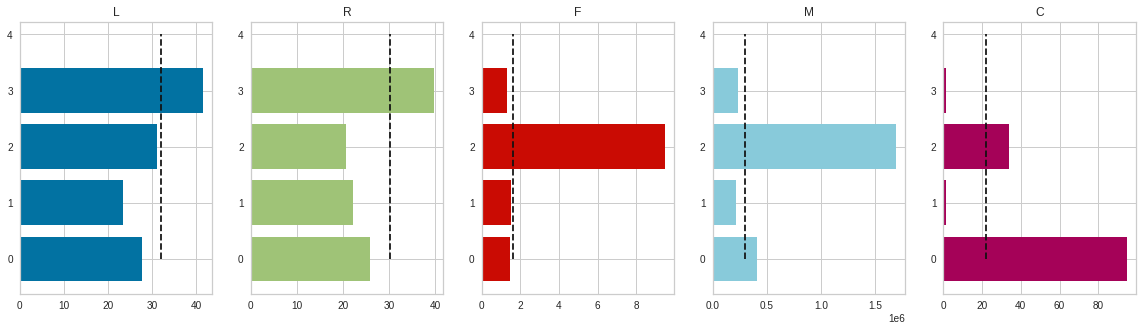

In [233]:
LRFMC=['L','R','F','M','C']

def dist_list(lst):
    plt.figure(figsize=[len(lst)*4,5])
    i = 1
    cl = ['bgrcm'[c] for c in range(len('bgrcm'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_LRFMC[col].mean(), ymin=0, ymax=4, color='k', linestyle='--')
        g = df_LRFMC.groupby('cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFMC)

## Analyze Using Radar Chart

In [234]:
import plotly.graph_objects as go

In [235]:
cluster_med = df_LRFMC_std.groupby('clusters').median().reset_index(drop=True)
cluster_med

,L,R,F,M,C
0,-0.334835,-0.271255,-0.338554,0.048543,1.958487
1,-0.646997,-0.655254,-0.338554,-0.374195,-0.557637
2,-0.232268,-0.975254,2.930502,3.252017,-0.041170
3,0.765165,0.847221,-0.338554,-0.372589,-0.557637


In [236]:
fig = go.Figure()

for i in range(4):
    fig.add_trace(go.Scatterpolar(r=cluster_med.loc[i].values.tolist() + cluster_med.loc[i].values.tolist()[:1],
                                  theta=cluster_med.columns.tolist() + cluster_med.columns.tolist()[:1],
                                  name="CLUSTER-%s"%cluster_med.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5,3.5])))

fig.show()

**Observation:**

**1. Cluster 0 (The Discount-Hunter)**

* A new user, because it has a low `L` point.
* New users who have just made a transaction, indicated by a low `R` point.
* Has a low `F` point, indicating this user rarely makes transactions.
* `M` & `C` points have high dominant values, it can be concluded that cluster 0 is a group of **new customers who only make transactions if there is a voucher/promo** or **"The Discount-Hunter"**.

**2. Cluster 1 (The Potential-Loyalist New Customer)**

* Because all points have low values, it can be concluded that cluster 1 is a group of **new customers who have just made their first transaction** or **The Potential-Loyalist New Customer**.

**3. Cluster 2 (The Superior-Buyer)**

* An average user, because it has a relatively average `L` point.
* Average users who have just made a transaction, indicated by a low `R` point.
* Has a low `C` point, indicating this user rarely uses promos/vouchers.
* `F` & `M` points have a very high value, it can be concluded that cluster 2 is a group of **average customers who frequently make transactions and do not hesitate to spend money for shopping** or **"The Superior-Buyer"**.

**4. Cluster 3 (The Hibernating)**

* An old user, because it has a fairly high `L` point.
* Old users who have not made transactions for a long time, indicated by a high `R` point.
* Points `F`, `M`, & `C` have low values, it can be concluded that cluster 3 is a group of old customers who are **no longer active** or **"The Hibernating"**.

# **Business Recommendation**

**1. The Discount-Hunter**

This customer cluster can be interpreted as an economical type of customer, because they are always waiting for a promo to orders, you should keep this type of customer so that they don't **Hibernate** and even stop subscribing. Business values that E-commerce can give example:
* Give vouchers (max 5%) to attract users attention with a maximum redemption time limit of 1 week,
* Provide a big sale event voucher (remaining warehouse stock) to impress many discounted items at affordable prices,
* Hold an event invite your friends to join by providing a reveral code to add points that can be exchanged for vouchers, etc.

**2. The Potential-Loyalist New Customer**

For this customer cluster, we must lead him to become a loyal customer in the future like the **Superior-Buyer** cluster, don't let this customer end **Hibernating** and move to a competitor brands. Business value that can be give to increase the value of transaction frequency and total money spent, for example:
* Provide special discount promos for new users to make transactions,
* Provide free shipping for the first 3 transactions, etc.

**3. The Superior-Buyer**

For this type of customer, we must maintain it, lest its performance decline and even move to competitor brands. Business values that E-commerce can give example:
* Offers VIP members with features providing the latest information about new products etc,
* give promo buy 2 get 3,
* give a discount with a minimum spend of 300,000 IDR, etc.

**4. The Hibernating**

There are many possibilities that make each user no longer active, for example the price is too high, the transaction process is complicated, the choice of color doesn't attract the user, and many more. To attract the attention of this type of user, for example:
* Do a reminder via email or whatsapp at least once a week,
* Provide recommendations for the best-selling items for the purpose of reminding users of E-commerce products,
* Provide information about developments and changes in e-commerce applications such as the ease of online transactions now, the existence of one day shipping services, better application display, etc.

In [237]:
customers_cluster = pd.DataFrame({ 'user_id' : user_id['user_id'], 'clusters' : pdf['clusters'] })
customers_cluster.head()

,user_id,clusters
0,2603.0,3.0
1,6097.0,3.0
2,7987.0,3.0
3,7988.0,3.0
4,7472.0,3.0


In [238]:
hibernating = customers_cluster[customers_cluster['clusters'] == 0]
disc_hunter = customers_cluster[customers_cluster['clusters'] == 1]
pot_loyal = customers_cluster[customers_cluster['clusters'] == 2]
super_buyer = customers_cluster[customers_cluster['clusters'] == 3]

In [239]:
hibernating

,user_id,clusters
87,7529.0,0.0
299,8602.0,0.0
333,8661.0,0.0
367,8756.0,0.0
1985,12166.0,0.0
...,...,...
24323,67601.0,0.0
24328,67651.0,0.0
24334,67660.0,0.0
24339,67688.0,0.0


In [240]:
disc_hunter

,user_id,clusters
269,8539.0,1.0
550,9049.0,1.0
2568,13619.0,1.0
2581,13104.0,1.0
2597,13701.0,1.0
...,...,...
24333,67659.0,1.0
24335,67674.0,1.0
24336,67667.0,1.0
24337,67507.0,1.0


In [241]:
pot_loyal

,user_id,clusters
16,4391.0,2.0
18,6.0,2.0
40,4392.0,2.0
70,8158.0,2.0
82,8133.0,2.0
...,...,...
24243,67292.0,2.0
24252,67310.0,2.0
24274,67381.0,2.0
24278,67353.0,2.0


In [242]:
super_buyer

,user_id,clusters
0,2603.0,3.0
1,6097.0,3.0
2,7987.0,3.0
3,7988.0,3.0
4,7472.0,3.0
...,...,...
22144,62342.0,3.0
22895,64048.0,3.0
22990,64245.0,3.0
23093,64451.0,3.0
